In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bank_note_data.csv')
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data['Class'].unique()

array([0, 1], dtype=int64)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
features = list(data.columns)[:-1]
target = list(data.columns)[-1]

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_norm = data.copy()
data_norm[features] = sc.fit_transform(data[features])
data_norm.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


### TSNE

In [8]:
from sklearn.manifold import TSNE
# TSNE -- t-distributed stochastic neighbor embedding

tsne = TSNE(learning_rate=500, n_components=2)
x_tsne = tsne.fit_transform(data_norm[features])
x_tsne

C:\Users\ANURAG\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[-36.963894 ,   2.419379 ],
       [-37.961803 ,  -1.5223379],
       [ -3.3368397, -48.01589  ],
       ...,
       [ 58.145523 , -26.450342 ],
       [ 49.750774 , -24.448923 ],
       [ 36.4329   ,   7.7821846]], dtype=float32)

In [9]:
y = data[target]


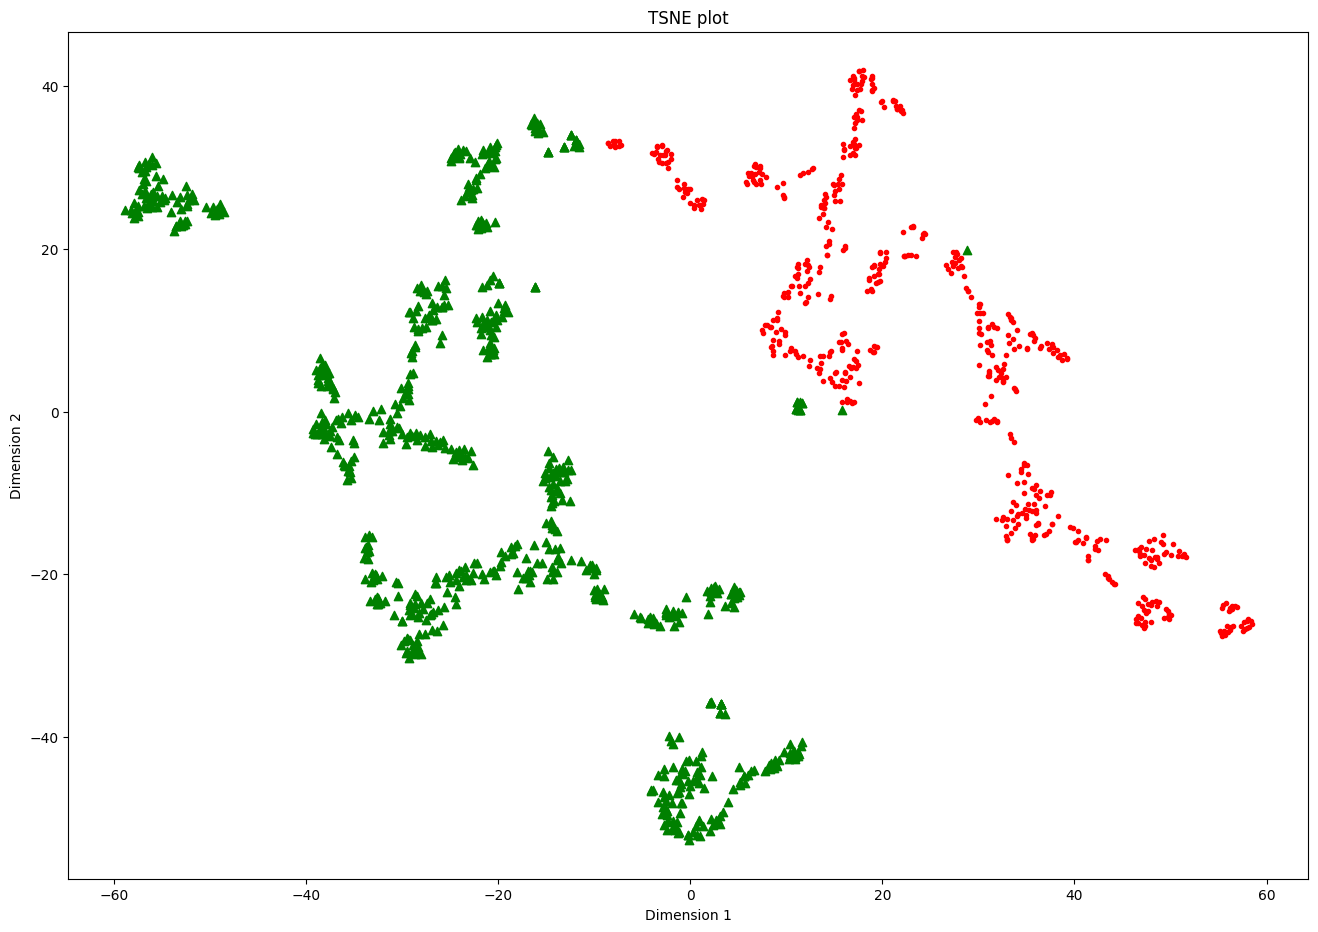

In [10]:
plt.figure(figsize=(16, 11))
plt.scatter(x_tsne[np.where(y == 0) , 0],x_tsne[np.where(y == 0) , 1], color = 'g', marker="^")
plt.scatter(x_tsne[np.where(y == 1) , 0],x_tsne[np.where(y == 1) , 1], color = 'r', marker=".")

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('TSNE plot')
plt.show()